In [21]:
import lasio
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.graph_objects as go

from welly import Well
from welly import Synthetic
from sklearn import preprocessing
import math

%matplotlib inline

In [16]:
df = pd.DataFrame(pd.read_excel("../data/GENERAL_WELL_DATA/Checkshot.xlsx"))

In [17]:
df.head()

,unique_wellbore_identifier,wellbore_name,table_name,time_type,no_of_points,depth_unit,index,depth,one_way_time,two_way_time
0,NaN,WELL-6,NaN,two-way,19,meters,0,670,360.3,720.6
1,NaN,WELL-6,NaN,two-way,19,meters,1,770,408.1,816.2
2,NaN,WELL-6,NaN,two-way,19,meters,2,845,441.2,882.4
3,NaN,WELL-6,NaN,two-way,19,meters,3,895,462.2,924.4
4,NaN,WELL-6,NaN,two-way,19,meters,4,940,481.3,962.6


In [18]:
df['TWT'] = df['two_way_time']/2000

In [19]:
df.head()

,unique_wellbore_identifier,wellbore_name,table_name,time_type,no_of_points,depth_unit,index,depth,one_way_time,two_way_time,TWT
0,NaN,WELL-6,NaN,two-way,19,meters,0,670,360.3,720.6,0.3603
1,NaN,WELL-6,NaN,two-way,19,meters,1,770,408.1,816.2,0.4081
2,NaN,WELL-6,NaN,two-way,19,meters,2,845,441.2,882.4,0.4412
3,NaN,WELL-6,NaN,two-way,19,meters,3,895,462.2,924.4,0.4622
4,NaN,WELL-6,NaN,two-way,19,meters,4,940,481.3,962.6,0.4813


In [20]:
df['velocity'] = df['depth']*1000/df['one_way_time']

In [ ]:
# df['Vi'] = SQRT((df['velocity']^2)*df['TWT']^2)-(df['velocity']^2)*df['TWT']^2)

In [5]:
# df['velocity1'] = df['depth']*2/df['two_way_time']
# # 

In [22]:
x_axis = df['depth']
y_axis = df['one_way_time']
v_axis = df['velocity']


In [23]:
d = [0];
t = [0];
v = [0];
for i in x_axis:
    d.append(i)
for i in y_axis:
    t.append(i)
for i in v_axis:
    v.append(i)
    
    

In [14]:
# vint = [0];
# for index, obj in enumerate(v):
# #     if(index <= 19):
#         index = index + 1;
#         #index = index + 1;
#         temp = ((v[index]**v[index])*t[index]) - ((v[index-1]**v[index-1])*t[index-1]);
#         d_temp = t[index]-t[index-1];
#         s_temp = temp/d_temp;
#         #print(abs(s_temp))
#         #print(math.sqrt(s_temp));
#         vint.append(math.sqrt(abs(s_temp)))
    

OverflowError: (34, 'Numerical result out of range')

In [24]:
pd.DataFrame([d,t,v])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,670.000000,770.000000,845.000000,895.000000,940.00000,990.000000,1020.000000,1080.000000,1155.000000,1200.000000,1230.000000,1280.000000,1315.000000,1335.000000,1378.000000,1378.000000,1425.00000,1475.000000,1495.000000
1,0,360.300000,408.100000,441.200000,462.200000,481.30000,501.200000,513.300000,537.300000,566.000000,584.300000,596.300000,614.000000,628.600000,634.800000,651.300000,650.500000,666.70000,684.700000,691.600000
2,0,1859.561477,1886.792453,1915.231188,1936.391173,1953.04384,1975.259377,1987.142022,2010.050251,2040.636042,2053.739517,2062.720107,2084.690554,2091.950366,2103.024575,2115.768463,2118.370484,2137.39313,2154.228129,2161.654135


In [335]:
d = preprocessing.normalize([d])[0]
t = preprocessing.normalize([t])[0]
v = preprocessing.normalize([v])[0]
vint = preprocessing.normalize([vint])[0]

In [21]:
min(v)

0

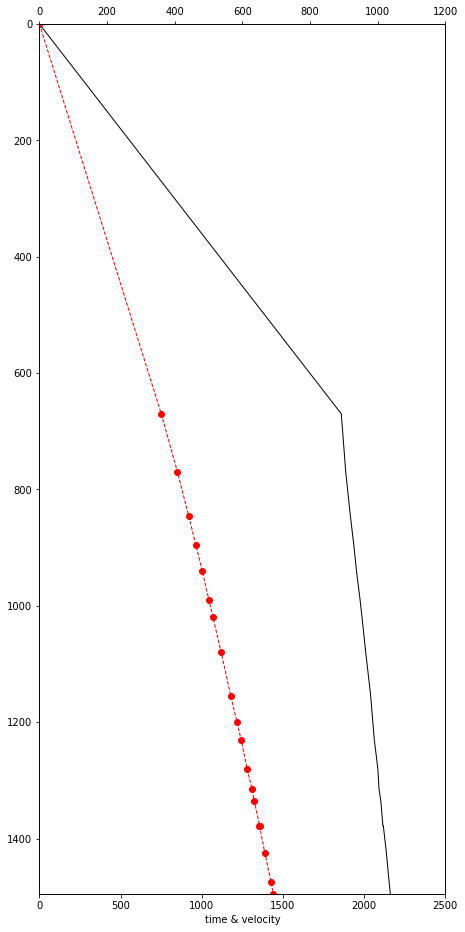

In [33]:


# Set up the figure. 
fig = plt.figure(figsize=(16,16))

##################################################################
# Plot into the figure.
# First, the lith log, the full width of the log. 
ax = fig.add_subplot(121)

# Plot the DT with a white fill to fake the curve fill.
ax.plot(v,d, color='black', lw=1)
# ax.plot(t, vint, color='green', lw=1)
# ax.fill_betweenx(t, d, plot_max, color='w', zorder = 2)
ax.set_xlabel("time & velocity")

# Limit axes. 
ax.set_xlim(0,2500)
ax.set_ylim(max(df["depth"].values), 0);

##################################################################
# Plot into the figure.
# First, the lith log, the full width of the log. 
ax1 = ax.twiny() # fig.add_subplot(122)

# Plot the DT with a white fill to fake the curve fill.
ax1.plot(t, d, color='red', lw=1, marker='o',linestyle='--')
# ax.fill_betweenx(t, d, plot_max, color='w', zorder = 2)
# ax1.set_xlabel("Depth Points")

# Limit axes. 
ax1.set_xlim(0,1200)
ax1.set_ylim(max(df["depth"].values), 0);

plt.show()